In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.svm import SVR
import xgboost as xgb
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ulklc/covid19-timeseries/master/countryReport/raw/rawReport.csv')
data = data.drop(['countryCode', 'lat', 'lon'], axis = 1)
data.loc[data.region == 'Europe', 'region'] = 0
data.loc[data.region == 'Asia', 'region'] = 1
data.loc[data.region == 'Americas', 'region'] = 2
data.loc[data.region == 'Africa', 'region'] = 3
data.loc[data.region == 'Oceania', 'region'] = 4
data.head() 

,day,countryName,region,confirmed,recovered,death
0,2020/01/22,Andorra,0,0,0,0
1,2020/01/23,Andorra,0,0,0,0
2,2020/01/24,Andorra,0,0,0,0
3,2020/01/25,Andorra,0,0,0,0
4,2020/01/26,Andorra,0,0,0,0


In [ ]:
data.countryName.nunique()

212

In [ ]:
old_people = pd.read_csv('6aa93060-6a3d-4f76-b0e8-2a03fbb2a3ac_Data.csv')
old_people.head()

,Series Name,Series Code,Country Name,Country Code,2016 [YR2016]
0,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,Albania,ALB,12.956211080924
1,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,Afghanistan,AFG,2.51992254366443
2,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,Algeria,DZA,6.00798118101593
3,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,American Samoa,ASM,..
4,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,Andorra,AND,..


In [ ]:
finance = pd.read_csv('8101258b-2415-4c15-bbb0-8426404255eb_Data.csv')
finance.head()

,Series Name,Series Code,Country Name,Country Code,2016 [YR2016]
0,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Afghanistan,AFG,57.24876048
1,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Albania,ALB,271.54304258
2,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Algeria,DZA,260.41257932
3,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,American Samoa,ASM,..
4,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,Andorra,AND,3834.73058142


In [ ]:
sanitary = pd.read_csv('5a8eb3da-36fc-4de0-a25c-818d2a7c39dc_Data.csv')
sanitary.head()

,Series Name,Series Code,Country Name,Country Code,2015 [YR2015]
0,People using at least basic sanitation service...,SH.STA.BASS.ZS,Afghanistan,AFG,40.7077070107199
1,People using at least basic sanitation service...,SH.STA.BASS.ZS,Albania,ALB,97.6910339666252
2,People using at least basic sanitation service...,SH.STA.BASS.ZS,Algeria,DZA,87.4967167440158
3,People using at least basic sanitation service...,SH.STA.BASS.ZS,American Samoa,ASM,56.7605327109848
4,People using at least basic sanitation service...,SH.STA.BASS.ZS,Andorra,AND,100.00000244488


In [ ]:
pops = {}
fails = []

regions = sorted(data['countryName'].unique())
for r in regions:
  try:
    n = new.loc[new['Country Name']==r].values[-1][-1]
    pops[r] = new.loc[new['Country Name']==r].values[-1][-1]
  except:
    fails.append(r)
    print('No pop data for', r)

In [ ]:
train = pd.read_csv('train.csv')
train.head()

In [ ]:
print(train.Territory.unique())
for name in sorted(data.countryName.unique()):
    if name not in train.Territory.unique():
        print(name)

In [ ]:
data['popul_old'] = '..'
data['financial'] = '..'
data['sanitary'] = '..'
for name in data.countryName.unique():
    if name in old_people['Country Name'].unique():
        data.loc[data.countryName==name, 'popul_old'] = old_people.loc[old_people['Country Name']==name].values[-1][-1]
    if name in finance['Country Name'].unique():
        data.loc[data.countryName==name, 'financial'] = finance.loc[finance['Country Name']==name].values[-1][-1]
    if name in sanitary['Country Name'].unique():
        data.loc[data.countryName==name, 'sanitary'] = sanitary.loc[sanitary['Country Name']==name].values[-1][-1]

In [ ]:
data = data.loc[(data['countryName'] != 'Diamond Princess') & (data.countryName != 'MS Zaandam')]
data.loc[data.countryName=='Bahamas', 'countryName'] = 'Bahamas (the)'
data.loc[data.countryName=='Bolivia', 'countryName'] = 'Bolivia (Plurinational State of)'
data.loc[data.countryName=='Brunei', 'countryName'] = 'Brunei Darussalam'
data.loc[data.countryName=='Cape Verde', 'countryName'] = 'Cabo Verde'
data.loc[data.countryName=='Central African Republic', 'countryName'] = 'Central African Republic (the)'
data.loc[data.countryName=='Curaçao', 'countryName'] = 'Curacao'
data.loc[data.countryName=='DR Congo', 'countryName'] = 'Democratic Republic of the Congo (the)'
data.loc[data.countryName=='Dominican Republic', 'countryName'] = 'Dominican Republic (the)'
data.loc[data.countryName=='Gambia', 'countryName'] = 'Gambia (the)'
data.loc[data.countryName=='Iran', 'countryName'] = 'Iran (Islamic Republic of)'
data.loc[data.countryName=='Laos', 'countryName'] = "Lao People's Democratic Republic (the)"
data.loc[data.countryName=='Netherlands', 'countryName'] = 'Netherlands (the)'
data.loc[data.countryName=='Niger', 'countryName'] = 'Niger (the)'
data.loc[data.countryName=='Philippines', 'countryName'] = 'Philippines (the)'
data.loc[data.countryName=='Republic of the Congo', 'countryName'] = 'Congo (the)'
data.loc[data.countryName=='Moldova', 'countryName'] = 'Republic of Moldova (the)'
data.loc[data.countryName=='Russia', 'countryName'] = 'Russian Federation (the)'
data.loc[data.countryName=='Réunion', 'countryName'] = 'Reunion'
data.loc[data.countryName=='Saint Barthélemy', 'countryName'] = 'Saint Barthelemy'
data.loc[data.countryName=='South Korea', 'countryName'] = 'Republic of Korea (the)'
data.loc[data.countryName=='Sudan', 'countryName'] = 'Sudan (the)'
data.loc[data.countryName=='Syria', 'countryName'] = 'Syrian Arab Republic (the)'
data.loc[data.countryName=='Tanzania', 'countryName'] = 'United Republic of Tanzania (the)'
data.loc[data.countryName=='United Arab Emirates', 'countryName'] = 'United Arab Emirates (the)'
data.loc[data.countryName=='United Kingdom', 'countryName'] = 'United Kingdom of Great Britain and Northern Ireland (the)'
data.loc[data.countryName=='United States', 'countryName'] = 'United States of America (the)'
data.loc[data.countryName=='Saint Martin', 'countryName'] = 'St Martin'
data.loc[data.countryName=='Venezuela', 'countryName'] = 'Venezuela (Bolivarian Republic of)'
data.loc[data.countryName=='Vietnam', 'countryName'] = 'Viet Nam'

In [ ]:
for name in data.countryName.unique():
    if name in old_people['Country Name'].unique():
        data.loc[data.countryName==name, 'popul_old'] = old_people.loc[old_people['Country Name']==name].values[-1][-1]
    if name in finance['Country Name'].unique():
        data.loc[data.countryName==name, 'financial'] = finance.loc[finance['Country Name']==name].values[-1][-1]
    if name in sanitary['Country Name'].unique():
        data.loc[data.countryName==name, 'sanitary'] = sanitary.loc[sanitary['Country Name']==name].values[-1][-1]

In [ ]:
data.head()

In [ ]:
mean_region_popul_old = dict()
mean_region_sanit = dict()
mean_region_financial = dict()
for name in data.region.unique():
  mean_region_popul_old[name] = data.loc[data.region == name].query('popul_old != ".."')['popul_old'].astype(np.float64).mean()
  mean_region_sanit[name] = data.loc[data.region == name].query('sanitary != ".."')['sanitary'].astype(np.float64).mean()
  mean_region_financial[name] = data.loc[data.region == name].query('financial != ".."')['financial'].astype(np.float64).mean()

In [ ]:
for region in data.region.unique():
  data.loc[(data.region == region) & (data.popul_old == '..'), 'popul_old']=mean_region_popul_old[region]
  data.loc[(data.region == region) & (data.sanitary == '..'), 'sanitary']=mean_region_sanit[region]
  data.loc[(data.region == region) & (data.financial == '..'), 'financial']=mean_region_financial[region]
data['real'] = data['confirmed'] - data['recovered'] - data['death']
data.head()

,day,countryName,region,confirmed,recovered,death,popul_old,financial,sanitary,real
0,2020/01/22,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0
1,2020/01/23,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0
2,2020/01/24,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0
3,2020/01/25,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0
4,2020/01/26,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0


In [ ]:
def dist(x):
  r = x
  r_pred = r[0]
  for i in range(1,len(r)):
    dist = r[i] - r_pred
    r_pred = r[i]
    r[i] = dist
  return r
for name in data.countryName.unique():
  data.loc[data.countryName == name, 'death_dist'] = dist(data.loc[data.countryName == name, 'death'].values)
  data.loc[data.countryName == name, 'confirmed_dist'] = dist(data.loc[data.countryName == name, 'confirmed'].values)

In [ ]:
list_of_zeros = pd.DataFrame(columns = data.columns)
for name in data.countryName.unique():
  if data.loc[data.countryName == name, 'death'].values[-3] == 0:
    list_of_zeros = pd.concat([list_of_zeros, data.loc[data.countryName == name]])
    data = data.loc[data.countryName != name]

In [ ]:
picks = []
day_of_peaks = []
start_death = []
start_conf = []
for name in data.countryName.unique():
  values = data.query('death > 0.0').loc[data.countryName==name, 'death_dist'].values
  picks.append(np.where(values==np.max(values))[-1][-1])
  values = data.loc[data.countryName==name, 'death_dist'].values
  day_of_peaks.append(np.where(values==np.max(values))[-1][-1])
  start_death.append(len(data.query('death < 1').loc[data.countryName==name, 'real'].values))
  start_conf.append(len(data.query('confirmed < 1').loc[data.countryName==name, 'real'].values))

In [ ]:
 for index, name in enumerate(data.countryName.unique()):
  data.loc[data.countryName == name, 'peaks'] = picks[index]
  data.loc[data.countryName == name, 'day_of_peaks'] = day_of_peaks[index]
  data.loc[data.countryName == name, 'start_death'] = start_death[index]
  data.loc[data.countryName == name, 'start_conf'] = start_conf[index]

In [ ]:
data_train = pd.DataFrame(columns = data.columns)
for name in data.countryName.unique():
    data_train = pd.concat([data_train, data.loc[data.countryName==name].iloc[:1]])
data_train.head()

,day,countryName,region,confirmed,recovered,death,popul_old,financial,sanitary,real,death_dist,peaks,day_of_peaks,start_death,start_conf
0,2020/01/22,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0,0.0,9.0,69.0,60.0,40.0
100,2020/01/22,United Arab Emirates (the),1,0,0,0,0.986990678326415,1323.11680312,98.577782471415,0,0.0,40.0,98.0,58.0,7.0
200,2020/01/22,Afghanistan,1,0,0,0,2.51992254366443,57.24876048,40.7077070107199,0,0.0,36.0,96.0,60.0,33.0
300,2020/01/22,Antigua and Barbuda,2,0,0,0,8.3605742274694,623.11462593,87.5042823844152,0,0.0,9.0,85.0,76.0,51.0
500,2020/01/22,Albania,0,0,0,0,12.956211080924,271.54304258,97.6910339666252,0,0.0,20.0,69.0,49.0,47.0


In [ ]:
data_train = data_train.query('day_of_peaks<80')
X = data_train[['region', 'popul_old', 'financial', 'sanitary', 'start_death', 'start_conf']].astype(np.float64)
y = data_train.peaks.astype(np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model_linear_regressor = xgb.XGBRegressor(n_estimators = 10000, max_depth = 4, learning_rate = 0.003, n_jobs = -1, random_state = 42, reg_lambda = 1)
model_linear_regressor.fit(X_train,y_train)
model_linear_regressor.score(X,y)

[07:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8336807523722354

In [ ]:
data_temp = pd.DataFrame(columns = data.columns)
for name in data.countryName.unique():
    data_temp = pd.concat([data_temp, data.loc[data.countryName==name].iloc[:1]])
data_temp['pred_peak'] = np.round(model_linear_regressor.predict(data_temp[['region', 'popul_old', 'financial', 'sanitary', 'start_death', 'start_conf']].astype(np.float64)))
data_temp.head()

,day,countryName,region,confirmed,recovered,death,popul_old,financial,sanitary,real,death_dist,peaks,day_of_peaks,start_death,start_conf,pred_peak
0,2020/01/22,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0,0.0,9.0,69.0,60.0,40.0,5.0
100,2020/01/22,United Arab Emirates (the),1,0,0,0,0.986990678326415,1323.11680312,98.577782471415,0,0.0,40.0,98.0,58.0,7.0,19.0
200,2020/01/22,Afghanistan,1,0,0,0,2.51992254366443,57.24876048,40.7077070107199,0,0.0,36.0,96.0,60.0,33.0,4.0
300,2020/01/22,Antigua and Barbuda,2,0,0,0,8.3605742274694,623.11462593,87.5042823844152,0,0.0,9.0,85.0,76.0,51.0,-0.0
500,2020/01/22,Albania,0,0,0,0,12.956211080924,271.54304258,97.6910339666252,0,0.0,20.0,69.0,49.0,47.0,20.0


In [ ]:
def peak(x):
  r = x
  if (r[-1] < r[-5]) or (r[-4] < (data.loc[data.countryName == 'Andorra'].shape[0]-1)):
    r[-1] = r[-5]
  return r
data_temp = data_temp.apply(peak, axis = 1)[['countryName', 'peaks', 'day_of_peaks', 'pred_peak', 'start_death']]
data_temp.head()

,countryName,peaks,day_of_peaks,pred_peak,start_death
0,Andorra,9.0,69.0,9.0,60.0
100,United Arab Emirates (the),40.0,98.0,40.0,58.0
200,Afghanistan,36.0,96.0,36.0,60.0
300,Antigua and Barbuda,9.0,85.0,9.0,76.0
500,Albania,20.0,69.0,20.0,49.0


In [ ]:
cases = pd.DataFrame(columns = data.loc[data.countryName=='Andorra'].day.values)
for name in data.countryName.unique():
    data_pred = data.loc[data.countryName==name][['death']].T
    data_pred = pd.DataFrame(data_pred.values, columns = data.loc[data.countryName=='Andorra'].day.values)
    cases = pd.concat([cases, data_pred])
cases['country'] = data.countryName.unique()
for name in data.countryName.unique():
  cases.loc[cases.country == name, 'peaks_pred'] = data_temp.loc[data_temp.countryName == name, 'pred_peak'].values[-1]
  cases.loc[cases.country == name, 'peaks_now'] = data_temp.loc[data_temp.countryName == name, 'peaks'].values[-1]
cases.head()

,2020/01/22,2020/01/23,2020/01/24,2020/01/25,2020/01/26,2020/01/27,2020/01/28,2020/01/29,2020/01/30,2020/01/31,2020/02/01,2020/02/02,2020/02/03,2020/02/04,2020/02/05,2020/02/06,2020/02/07,2020/02/08,2020/02/09,2020/02/10,2020/02/11,2020/02/12,2020/02/13,2020/02/14,2020/02/15,2020/02/16,2020/02/17,2020/02/18,2020/02/19,2020/02/20,2020/02/21,2020/02/22,2020/02/23,2020/02/24,2020/02/25,2020/02/26,2020/02/27,2020/02/28,2020/02/29,2020/03/01,...,2020/03/25,2020/03/26,2020/03/27,2020/03/28,2020/03/29,2020/03/30,2020/03/31,2020/04/01,2020/04/02,2020/04/03,2020/04/04,2020/04/05,2020/04/06,2020/04/07,2020/04/08,2020/04/09,2020/04/10,2020/04/11,2020/04/12,2020/04/13,2020/04/14,2020/04/15,2020/04/16,2020/04/17,2020/04/18,2020/04/19,2020/04/20,2020/04/21,2020/04/22,2020/04/23,2020/04/24,2020/04/25,2020/04/26,2020/04/27,2020/04/28,2020/04/29,2020/04/30,country,peaks_pred,peaks_now
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,Andorra,9.0,9.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,3,5,6,8,8,9,10,10,11,12,12,14,16,20,22,25,28,33,35,37,37,41,43,46,52,56,64,71,76,82,89,98,105,United Arab Emirates (the),40.0,40.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,Afghanistan,36.0,36.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Antigua and Barbuda,9.0,9.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,Albania,20.0,20.0


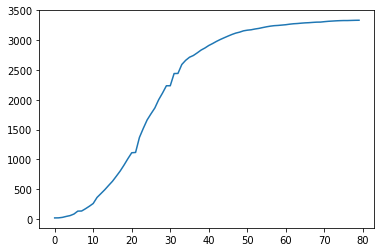

In [ ]:
y_true = cases.loc[cases.country=='China'].iloc[:,:-2].values[-1]
fig_true = plt.figure()
plt.plot(np.array(range(y_true.shape[0])), y_true)
plt.show()

In [ ]:
a_nice = np.zeros(cases.shape[0])
b_nice = np.zeros(cases.shape[0])
c_nice = np.zeros(cases.shape[0])
list_zeros = []
list_of_predictions = dict()
def mape(y_true, y_pred):
  return np.mean(np.abs((y_true[1:] - y_pred[1:]) / y_true[1:]) * 100)
for j in range(cases.shape[0]):

  if cases.iloc[j,:1][0] == 0:
    y_true = pd.Series(cases.iloc[j,:-3].values[np.where(cases.iloc[j,:-3].values==0)[0][-1]:].astype(np.float64))
  else:
    y_true = pd.Series(cases.iloc[j,:-3].values.astype(np.float64))
  loss = -100
  index = data_temp.loc[data_temp.countryName == cases.iloc[j,-3], 'day_of_peaks'].values[-1]
  start_b = cases.iloc[j,int(index)]

  if (cases.iloc[j,-2] > 0) and (cases.iloc[j,-1] > 0):
    c = cases.iloc[j, -2]
    k = cases.iloc[j, -2]*2/(cases.iloc[j,-1])
  else:
    c = y_true.shape[0]
    k = 2

  print('Epoch ', j, '[', end = '')

  for a in np.arange(0.001,2, 0.001):
    if (a%0.2) < 10**(-5):
      print('=', end = '')
    if abs(a-1.99)<10**(-5):
      print('=>', end = '')
    for b in np.arange(k * start_b, k * start_b * 2, 100):
      y_pred = np.array(list(map(lambda x: np.round(b * (-1 / ( 1 + np.exp(a * (x - c) ) )+1) ), range(y_true.shape[0]))))
      loss_prob = r2_score(y_true,y_pred)
      if loss < loss_prob:
          loss = loss_prob
          a_nice[j] = a
          b_nice[j] = b
          c_nice[j] = c
  print('country: ', cases.iloc[j,-3], ';', ' A=', a_nice[j], ' B=', b_nice[j], ' C=', c_nice[j], start_b, ';  Loss:', loss, sep = '')
  y_pred = np.array(list(map(lambda x: b_nice[j]*( -1 / (1 + np.exp( a_nice[j] * (x - c_nice[j]) ) )+1), range(int(139-data_temp.loc[data_temp.countryName == cases.iloc[j,-3], 'start_death'].values[-1])))))
  list_of_predictions[cases.iloc[j,-3]] = y_pred
  fig_true = plt.figure()
  plt.plot(np.array(range(y_true.shape[0])), y_true)
  plt.show()
  fig_predict = plt.figure()
  plt.plot(np.array(range(int(139-data_temp.loc[data_temp.countryName == cases.iloc[j,-3], 'start_death'].values[-1]))),y_pred)
  plt.show()
  print()

In [ ]:
picks = []
day_of_peaks = []
start_conf = []
for name in data.countryName.unique():
  values = data.query('confirmed > 0.0').loc[data.countryName==name, 'confirmed_dist'].values
  picks.append(np.where(values==np.max(values))[-1][-1])
  values = data.loc[data.countryName==name, 'confirmed_dist'].values
  day_of_peaks.append(np.where(values==np.max(values))[-1][-1])
  start_conf.append(len(data.query('confirmed < 1').loc[data.countryName==name, 'real'].values))

In [ ]:
 for index, name in enumerate(data.countryName.unique()):
  data.loc[data.countryName == name, 'peaks'] = picks[index]
  data.loc[data.countryName == name, 'day_of_peaks'] = day_of_peaks[index]
  data.loc[data.countryName == name, 'start_conf'] = start_conf[index]

In [ ]:
data_train = pd.DataFrame(columns = data.columns)
for name in data.countryName.unique():
    data_train = pd.concat([data_train, data.loc[data.countryName==name].iloc[:1]])
data_train.head()

,day,countryName,region,confirmed,recovered,death,popul_old,financial,sanitary,real,death_dist,peaks,day_of_peaks,start_death,start_conf,confirmed_dist
0,2020/01/22,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0,0.0,25.0,65.0,60.0,40.0,0.0
100,2020/01/22,United Arab Emirates (the),1,0,0,0,0.986990678326415,1323.11680312,98.577782471415,0,0.0,92.0,99.0,58.0,7.0,0.0
200,2020/01/22,Afghanistan,1,0,0,0,2.51992254366443,57.24876048,40.7077070107199,0,0.0,66.0,99.0,60.0,33.0,0.0
300,2020/01/22,Antigua and Barbuda,2,0,0,0,8.3605742274694,623.11462593,87.5042823844152,0,0.0,21.0,72.0,76.0,51.0,0.0
500,2020/01/22,Albania,0,0,0,0,12.956211080924,271.54304258,97.6910339666252,0,0.0,47.0,94.0,49.0,47.0,0.0


In [ ]:
data_train = data_train.query('day_of_peaks<80')
X = data_train[['region', 'popul_old', 'financial', 'sanitary', 'start_death', 'start_conf']].astype(np.float64)
y = data_train.peaks.astype(np.float64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model_linear_regressor = xgb.XGBRegressor(n_estimators = 10000, max_depth = 4, learning_rate = 0.003, n_jobs = -1, random_state = 42, reg_lambda = 1)
model_linear_regressor.fit(X_train,y_train)
model_linear_regressor.score(X,y)

[08:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8322809555186601

In [ ]:
data_temp = pd.DataFrame(columns = data.columns)
for name in data.countryName.unique():
    data_temp = pd.concat([data_temp, data.loc[data.countryName==name].iloc[:1]])
data_temp['pred_peak'] = np.round(model_linear_regressor.predict(data_temp[['region', 'popul_old', 'financial', 'sanitary', 'start_death', 'start_conf']].astype(np.float64)))
data_temp.head()

,day,countryName,region,confirmed,recovered,death,popul_old,financial,sanitary,real,death_dist,peaks,day_of_peaks,start_death,start_conf,confirmed_dist,pred_peak
0,2020/01/22,Andorra,0,0,0,0,17.483,3834.73058142,100.00000244488,0,0.0,25.0,65.0,60.0,40.0,0.0,29.0
100,2020/01/22,United Arab Emirates (the),1,0,0,0,0.986990678326415,1323.11680312,98.577782471415,0,0.0,92.0,99.0,58.0,7.0,0.0,61.0
200,2020/01/22,Afghanistan,1,0,0,0,2.51992254366443,57.24876048,40.7077070107199,0,0.0,66.0,99.0,60.0,33.0,0.0,25.0
300,2020/01/22,Antigua and Barbuda,2,0,0,0,8.3605742274694,623.11462593,87.5042823844152,0,0.0,21.0,72.0,76.0,51.0,0.0,21.0
500,2020/01/22,Albania,0,0,0,0,12.956211080924,271.54304258,97.6910339666252,0,0.0,47.0,94.0,49.0,47.0,0.0,26.0


In [ ]:
def peak(x):
  r = x
  if (r[-1] < r[-6]) or (r[-5] < (data.loc[data.countryName == 'Andorra'].shape[0]-1)):
    r[-1] = r[-6]
  return r
data_temp = data_temp.apply(peak, axis = 1)[['countryName', 'peaks', 'day_of_peaks', 'pred_peak', 'start_conf']]
data_temp.head()

,countryName,peaks,day_of_peaks,pred_peak,start_death
0,Andorra,25.0,65.0,25.0,60.0
100,United Arab Emirates (the),92.0,99.0,92.0,58.0
200,Afghanistan,66.0,99.0,66.0,60.0
300,Antigua and Barbuda,21.0,72.0,21.0,76.0
500,Albania,47.0,94.0,47.0,49.0


In [ ]:
cases = pd.DataFrame(columns = data.loc[data.countryName=='Andorra'].day.values)
for name in data.countryName.unique():
    data_pred = data.loc[data.countryName==name][['confirmed']].T
    data_pred = pd.DataFrame(data_pred.values, columns = data.loc[data.countryName=='Andorra'].day.values)
    cases = pd.concat([cases, data_pred])
cases['country'] = data.countryName.unique()
for name in data.countryName.unique():
  cases.loc[cases.country == name, 'peaks_pred'] = data_temp.loc[data_temp.countryName == name, 'pred_peak'].values[-1]
  cases.loc[cases.country == name, 'peaks_now'] = data_temp.loc[data_temp.countryName == name, 'peaks'].values[-1]
cases.head()

,2020/01/22,2020/01/23,2020/01/24,2020/01/25,2020/01/26,2020/01/27,2020/01/28,2020/01/29,2020/01/30,2020/01/31,2020/02/01,2020/02/02,2020/02/03,2020/02/04,2020/02/05,2020/02/06,2020/02/07,2020/02/08,2020/02/09,2020/02/10,2020/02/11,2020/02/12,2020/02/13,2020/02/14,2020/02/15,2020/02/16,2020/02/17,2020/02/18,2020/02/19,2020/02/20,2020/02/21,2020/02/22,2020/02/23,2020/02/24,2020/02/25,2020/02/26,2020/02/27,2020/02/28,2020/02/29,2020/03/01,...,2020/03/25,2020/03/26,2020/03/27,2020/03/28,2020/03/29,2020/03/30,2020/03/31,2020/04/01,2020/04/02,2020/04/03,2020/04/04,2020/04/05,2020/04/06,2020/04/07,2020/04/08,2020/04/09,2020/04/10,2020/04/11,2020/04/12,2020/04/13,2020/04/14,2020/04/15,2020/04/16,2020/04/17,2020/04/18,2020/04/19,2020/04/20,2020/04/21,2020/04/22,2020/04/23,2020/04/24,2020/04/25,2020/04/26,2020/04/27,2020/04/28,2020/04/29,2020/04/30,country,peaks_pred,peaks_now
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,738,743,743,745,Andorra,25.0,25.0
0,0,0,0,0,0,0,0,4,4,4,4,5,5,5,5,5,5,7,7,8,8,8,8,8,8,9,9,9,9,9,9,13,13,13,13,13,13,19,21,21,...,333,333,405,468,570,611,664,814,1024,1264,1505,1799,2076,2359,2659,2990,3360,3736,4123,4521,4933,5365,5825,6302,6302,6781,7265,7755,8238,8756,9281,9813,10349,10839,11380,11929,12481,United Arab Emirates (the),92.0,92.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,Afghanistan,66.0,66.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,21,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,Antigua and Barbuda,21.0,21.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,Albania,47.0,47.0


Epoch  0 [====>country: Andorra; A=0.217 B=634.0 C=25.0267;  Loss:0.9469262883502619


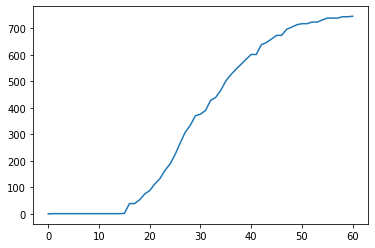

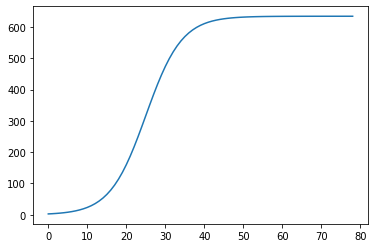


Epoch  1 [

KeyboardInterrupt: ignored

In [ ]:
a_nice = np.zeros(cases.shape[0])
b_nice = np.zeros(cases.shape[0])
c_nice = np.zeros(cases.shape[0])
list_zeros = []
list_of_predictions = dict()
def mape(y_true, y_pred):
  return np.mean(np.abs((y_true[1:] - y_pred[1:]) / y_true[1:]) * 100)
for j in range(cases.shape[0]):

  if cases.iloc[j,:1][0] == 0:
    y_true = pd.Series(cases.iloc[j,:-3].values[np.where(cases.iloc[j,:-3].values==0)[0][-1]:].astype(np.float64))
  else:
    y_true = pd.Series(cases.iloc[j,:-3].values.astype(np.float64))
  loss = -100
  index = data_temp.loc[data_temp.countryName == cases.iloc[j,-3], 'day_of_peaks'].values[-1]
  start_b = cases.iloc[j,int(index)]

  if (cases.iloc[j,-2] > 0) and (cases.iloc[j,-1] > 0):
    c = cases.iloc[j, -2]
    k = cases.iloc[j, -2]*2/(cases.iloc[j,-1])
  else:
    c = y_true.shape[0]
    k = 2

  print('Epoch ', j, '[', end = '')

  for a in np.arange(0.001,2, 0.001):
    if (a%0.2) < 10**(-5):
      print('=', end = '')
    if abs(a-1.99)<10**(-5):
      print('=>', end = '')
    for b in np.arange(k * start_b, k * start_b * 3, 300):
      y_pred = np.array(list(map(lambda x: np.round(b * (-1 / ( 1 + np.exp(a * (x - c) ) )+1) ), range(y_true.shape[0]))))
      loss_prob = r2_score(y_true,y_pred)
      if loss < loss_prob:
          loss = loss_prob
          a_nice[j] = a
          b_nice[j] = b
          c_nice[j] = c
  print('country: ', cases.iloc[j,-3], ';', ' A=', a_nice[j], ' B=', b_nice[j], ' C=', c_nice[j], start_b, ';  Loss:', loss, sep = '')
  y_pred = np.array(list(map(lambda x: b_nice[j]*( -1 / (1 + np.exp( a_nice[j] * (x - c_nice[j]) ) )+1), range(int(139-data_temp.loc[data_temp.countryName == cases.iloc[j,-3], 'start_death'].values[-1])))))
  list_of_predictions[cases.iloc[j,-3]] = y_pred
  fig_true = plt.figure()
  plt.plot(np.array(range(y_true.shape[0])), y_true)
  plt.show()
  fig_predict = plt.figure()
  plt.plot(np.array(range(int(139-data_temp.loc[data_temp.countryName == cases.iloc[j,-3], 'start_death'].values[-1]))),y_pred)
  plt.show()
  print()

In [ ]:
subs = pd.read_csv('SampleSubmission.csv')

In [ ]:
subs['Territory'] = [k[0].split()[0] for k in subs.values]
subs['Date'] = [k[0].split()[2] for k in subs.values]

In [ ]:
subs.iloc[:94]

,Territory X Date,target,Territory,Date
0,Afghanistan X 03/06/20,0,Afghanistan,03/06/20
1,Afghanistan X 03/07/20,0,Afghanistan,03/07/20
2,Afghanistan X 03/08/20,0,Afghanistan,03/08/20
3,Afghanistan X 03/09/20,0,Afghanistan,03/09/20
4,Afghanistan X 03/10/20,0,Afghanistan,03/10/20
...,...,...,...,...
89,Afghanistan X 06/03/20,0,Afghanistan,06/03/20
90,Afghanistan X 06/04/20,0,Afghanistan,06/04/20
91,Afghanistan X 06/05/20,0,Afghanistan,06/05/20
92,Afghanistan X 06/06/20,0,Afghanistan,06/06/20


In [ ]:
death_now = []
for name in data.countryName.unique():
  death_now.append(data.loc[data.countryName == name, 'death'].values[71:])

In [ ]:
data_predictions = pd.DataFrame(columns = ['Date', 'country', 'target'])
for i in range(cases.shape[0]):
  if cases.iloc[i,-3] != 'China':
    list_pred = np.zeros(67)
    if cases.iloc[i,:1][0] == 0:
      y_true = pd.Series(cases.iloc[i,:-3].values[np.where(cases.iloc[i,:-3].values==0)[0][-1]:].astype(np.float64))
    else:
      y_true = pd.Series(cases.iloc[i,:-3].values.astype(np.float64))
    for first in range(len(death_now[i])):
      list_pred[first] = death_now[i][first]
    for second in range(y_true.shape[0], 67 - len(death_now[i]) + y_true.shape[0]):
      first+=1
      list_pred[first] = list_of_predictions[cases.iloc[i,-3]][second]
    df = pd.DataFrame(subs.iloc[27:94]['Date'].values).rename(columns = {0: 'Date'})
    df['country'] = cases.iloc[i,-3]
    df['target'] = list_pred
    data_predictions = pd.concat([data_predictions, df])

In [ ]:
for name in list_of_zeros.countryName.unique():
  list_pred = np.zeros(67)
  df = pd.DataFrame(subs.iloc[27:94]['Date'].values).rename(columns = {0: 'Date'})
  df['country'] = name
  df['target'] = list_pred
  data_predictions = pd.concat([data_predictions, df])

country: 0    China
Name: country, dtype: object; A=0.024 B=8500.0 C=86.04632;  Loss:0.7517826862709951


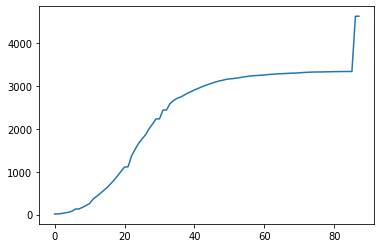

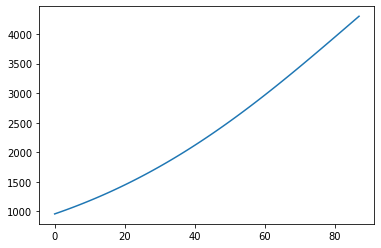

In [ ]:
a_china, b_china, c_china = 0,0,0
loss = -100
y_true = pd.Series(cases.loc[cases.country == 'China'].iloc[:,:-3].values.astype(np.float64)[0])
index = data_temp.loc[data_temp.countryName == cases.loc[cases.country == 'China'].iloc[:,-3][0], 'day_of_peaks'].values[-1]
start_b = cases.loc[cases.country == 'China'].iloc[:,int(index)][0]

c = cases.loc[cases.country == 'China'].iloc[:, -2][0]
k = cases.loc[cases.country == 'China'].iloc[:, -2][0]*2/(cases.loc[cases.country == 'China'].iloc[:,-1][0])
for a in np.arange(0.001,0.12, 0.001):
  for b in np.arange(3500, k * start_b * 2, 100):
    y_pred = np.array(list(map(lambda x: np.round(b * (-1 / ( 1 + np.exp(a * (x - c) ) )+1) ), range(y_true.shape[0]))))
    loss_prob = r2_score(y_true,y_pred)
    if (loss < loss_prob):
      loss = loss_prob
      a_china = a
      b_china = b
      c_china = c
print('country: ', cases.loc[cases.country == 'China'].iloc[:,-3], ';', ' A=', a_china, ' B=', b_china, ' C=', c_china, start_b, ';  Loss:', loss, sep = '')
y_pred = np.array(list(map(lambda x: b_china*( -1 / (1 + np.exp( a_china * (x - c_china) ) )+1), range(int(y_true.shape[0])))))
fig_true = plt.figure()
plt.plot(np.array(range(y_true.shape[0])), y_true)
plt.show()
fig_predict = plt.figure()
plt.plot(np.array(range(int(y_true.shape[0]))),y_pred)
plt.show()
print()

In [ ]:
y_pred = np.array(list(map(lambda x: b_china*( -1 / (1 + np.exp( a_china * (x - c_china) ) )+1), range(int(139-data_temp.loc[data_temp.countryName == 'China', 'start_death'].values[-1])))))

In [ ]:
for i in range(cases.shape[0]):
  if cases.iloc[i,-3] == 'China':
    list_pred = np.zeros(67)
    y_true = pd.Series(cases.iloc[i,:-3].values.astype(np.float64))
    for first in range(len(death_now[i])):
      list_pred[first] = death_now[i][first]
    for second in range(y_true.shape[0], 67 - len(death_now[i]) + y_true.shape[0]):
      first+=1
      list_pred[first] = y_pred[second]
    df = pd.DataFrame(subs.iloc[27:94]['Date'].values).rename(columns = {0: 'Date'})
    df['country'] = cases.iloc[i,-3]
    df['target'] = list_pred
    data_predictions = pd.concat([data_predictions, df])

In [ ]:
!curl -o EF.xlsx https://untermportal.un.org/unterm/country/downloadfile?targetLanguage=fr

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11199  100 11199    0     0   7392      0  0:00:01  0:00:01 --:--:--  7392


In [ ]:
countries = pd.read_excel('EF.xlsx')[:193]
countries.head(2)

,English short,French short,English formal,French formal
0,Afghanistan,Afghanistan (l'),the Islamic Republic of Afghanistan,la République islamique d'Afghanistan
1,Albania,Albanie (l'),the Republic of Albania,la République d'Albanie


In [ ]:
for name in countries.loc[~countries['English short'].isin(data_predictions['country'].values)]['English short'].unique():
  list_pred = np.zeros(67)
  df = pd.DataFrame(subs.iloc[27:94]['Date'].values).rename(columns = {0: 'Date'})
  df['country'] = name
  df['target'] = list_pred
  data_predictions = pd.concat([data_predictions, df])

In [ ]:
data_predictions = data_predictions.sort_values(['country', 'Date']).reset_index().drop(['index'], axis = 1)

In [ ]:
data_predictions['Territory X Date'] = ''

In [ ]:
def norm(x):
  r = x
  r[-2] = int(np.round(r[-2]))
  date = str(r[0]).split('/')
  if (date[0][0] == '0') and (date[1][0] == '0'):
    r[-1] = str(r[1]) + ' X ' + date[0][1] + '/' + date[1][1] + '/' + date[2]
  elif (date[0][0] == '0'):
    r[-1] = str(r[1]) + ' X ' + date[0][1] + '/' + date[1] + '/' + date[2]
  elif (date[1][0] == '0'):
    r[-1] = str(r[1]) + ' X ' + date[0] + '/' + date[1][1] + '/' + date[2]
  return r

In [ ]:
data_predictions = data_predictions.apply(norm, axis = 1).reset_index().drop(['index'], axis = 1)
data_predictions = data_predictions[['Territory X Date', 'target']]
data_predictions

,Territory X Date,target
0,Afghanistan X 4/2/20,6
1,Afghanistan X 4/3/20,6
2,Afghanistan X 4/4/20,7
3,Afghanistan X 4/5/20,7
4,Afghanistan X 4/6/20,11
...,...,...
15204,Zimbabwe X 6/3/20,6
15205,Zimbabwe X 6/4/20,6
15206,Zimbabwe X 6/5/20,6
15207,Zimbabwe X 6/6/20,6


In [ ]:
#Make Submission file
data_predictions.index = data_predictions['Territory X Date']
data_predictions = data_predictions.drop(['Territory X Date'], axis = 1)
data_predictions.to_csv('Submission.csv')
data_predictions.head()

,target
Territory X Date,
Afghanistan X 4/2/20,6
Afghanistan X 4/3/20,6
Afghanistan X 4/4/20,7
Afghanistan X 4/5/20,7
Afghanistan X 4/6/20,11
